<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/k%E8%BF%91%E9%84%B0%E5%88%86%E9%A1%9E/README.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN
k-NN演算法可以說是最簡單的機器學習演算法。

## k-Neighbors classification
在最簡單的版本中，k-NN 演算法只考慮一個最近鄰，也就是距離我們想要預測的點最近的訓練資料點。使用forge資料集

In [1]:
%%capture
%pip install mglearn

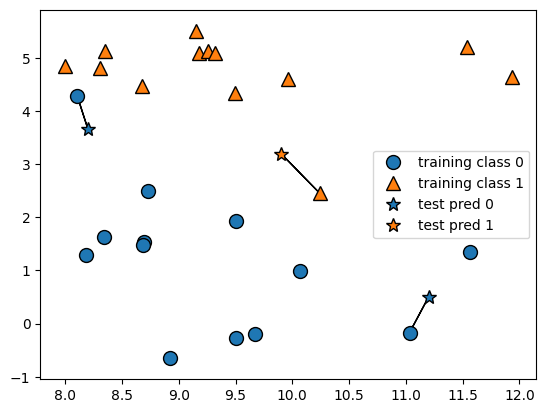

In [ ]:
# =============================================================================
# 教學目標：示範 KNN 演算法的基本概念 - 單一最近鄰分類
# 適用對象：機器學習初學者
# 學習重點：理解 KNN 演算法如何根據最近鄰進行分類
# =============================================================================

# 導入 mglearn 函式庫（用於機器學習教學和視覺化）
import mglearn

# =============================================================================
# 步驟1：繪製 KNN 分類圖（n_neighbors=1）
# 教學目的：讓學生直觀理解 KNN 演算法的分類過程
# AI提示：請使用 mglearn 繪製一個 KNN 分類圖，設定 n_neighbors=1
# =============================================================================
# 使用 mglearn 繪製 KNN 分類圖，n_neighbors=1 表示只考慮最近的1個鄰居
# 這會產生緊密遵循訓練資料的決策邊界
mglearn.plots.plot_knn_classification(n_neighbors=1)

# =============================================================================
# 教學重點說明：
# 1. n_neighbors=1：只考慮最近的1個鄰居進行分類
# 2. 決策邊界：會緊密跟隨訓練資料點，可能產生過擬合
# 3. 視覺化效果：幫助學生理解 KNN 演算法的分類邏輯
# =============================================================================

我們不僅可以考慮最近的鄰居，還可以考慮任意數量（k）的鄰居。這就是 k-最近鄰演算法的名稱由來。

這意味著對於每個測試點，我們計算有多少鄰居屬於類別 0，有多少鄰居屬於類別 1。

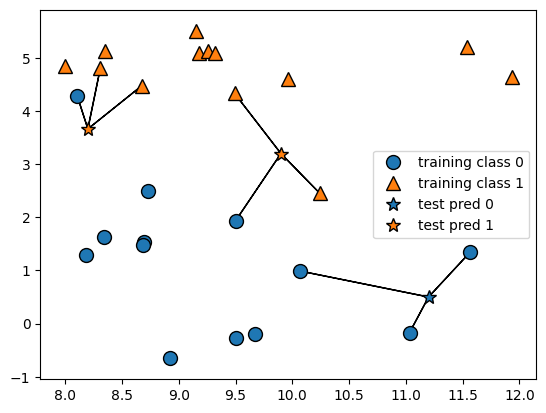

In [ ]:
# =============================================================================
# 教學目標：比較不同 n_neighbors 參數對 KNN 分類邊界的影響
# 適用對象：機器學習初學者
# 學習重點：理解 n_neighbors 參數如何影響模型的複雜度和泛化能力
# =============================================================================

# =============================================================================
# 步驟1：繪製 KNN 分類圖（n_neighbors=3）
# 教學目的：讓學生比較 n_neighbors=3 與 n_neighbors=1 的差異
# AI提示：請使用 mglearn 繪製一個 KNN 分類圖，設定 n_neighbors=3
# =============================================================================
# 使用 mglearn 繪製 KNN 分類圖，n_neighbors=3 表示考慮最近的3個鄰居
# 這會產生比 n_neighbors=1 更平滑的決策邊界
mglearn.plots.plot_knn_classification(n_neighbors=3)

# =============================================================================
# 教學重點說明：
# 1. n_neighbors=3：考慮最近的3個鄰居進行投票分類
# 2. 決策邊界：比 n_neighbors=1 更平滑，減少過擬合風險
# 3. 模型複雜度：較低的模型複雜度，更好的泛化能力
# 4. 比較學習：與前一個圖表對比，理解參數影響
# =============================================================================

雖然此範例針對的是二元分類問題，但此方法可應用於具有任意數量類別的資料集。

In [ ]:
# =============================================================================
# 教學目標：學習如何載入和檢視機器學習數據集
# 適用對象：機器學習初學者
# 學習重點：理解數據集的基本結構（特徵和標籤）
# =============================================================================

# =============================================================================
# 步驟1：載入 Forge 數據集
# 教學目的：讓學生了解如何載入和檢視機器學習數據集
# AI提示：請使用 mglearn 載入 make_forge 數據集，並檢視特徵和標籤
# =============================================================================
# 使用 mglearn 的 make_forge() 函數產生一個人工的二分類數據集
# 這個數據集專門設計用於教學，適合展示 KNN 演算法
X, y = mglearn.datasets.make_forge()

# =============================================================================
# 步驟2：檢視數據集內容
# 教學目的：讓學生理解數據集的結構和內容
# AI提示：請顯示數據集的特徵矩陣 X 和標籤向量 y
# =============================================================================
# 顯示特徵矩陣 X（包含所有樣本的特徵值）
display(X)
# 顯示標籤向量 y（包含每個樣本對應的類別標籤）
display(y)

# =============================================================================
# 教學重點說明：
# 1. X：特徵矩陣，每行代表一個樣本，每列代表一個特徵
# 2. y：標籤向量，包含每個樣本對應的類別（0 或 1）
# 3. Forge 數據集：人工生成的二分類數據集，適合教學使用
# 4. 數據預處理：在機器學習中，理解數據結構是第一步
# =============================================================================

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
# =============================================================================
# 教學目標：學習機器學習中的數據集分割技巧
# 適用對象：機器學習初學者
# 學習重點：理解訓練集和測試集的概念及分割方法
# =============================================================================

# 導入 sklearn 的數據分割函數
from sklearn.model_selection import train_test_split

# =============================================================================
# 步驟1：分割數據集為訓練集和測試集
# 教學目的：讓學生理解為什麼需要分割數據集
# AI提示：請使用 train_test_split 將數據集分割為訓練集和測試集
# =============================================================================
# 使用 train_test_split 函數將數據集分割為訓練集和測試集
# random_state=0 確保每次執行結果一致（可重現性）
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# =============================================================================
# 步驟2：檢視分割後的數據集
# 教學目的：讓學生理解訓練集和測試集的結構
# AI提示：請顯示分割後的訓練集和測試集的特徵和標籤
# =============================================================================
# 顯示訓練集的特徵矩陣
display(X_train)
# 顯示測試集的特徵矩陣
display(X_test)

# 顯示訓練集的標籤向量
display(y_train)
# 顯示測試集的標籤向量
display(y_test)

# =============================================================================
# 教學重點說明：
# 1. 訓練集：用於訓練模型，讓模型學習數據中的模式
# 2. 測試集：用於評估模型性能，模擬真實世界的預測情況
# 3. 數據分割：避免過擬合，確保模型泛化能力
# 4. random_state：確保結果可重現，便於教學和調試
# 5. 分割比例：預設為 75% 訓練集，25% 測試集
# =============================================================================

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

array([[11.54155807,  5.21116083],
       [10.06393839,  0.99078055],
       [ 9.49123469,  4.33224792],
       [ 8.18378052,  1.29564214],
       [ 8.30988863,  4.80623966],
       [10.24028948,  2.45544401],
       [ 8.34468785,  1.63824349]])

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

array([1, 0, 1, 0, 1, 1, 0])

In [ ]:
# =============================================================================
# 教學目標：學習如何建立和訓練 KNN 分類器
# 適用對象：機器學習初學者
# 學習重點：理解機器學習模型的建立和訓練過程
# =============================================================================

# 導入 sklearn 的 KNN 分類器
from sklearn.neighbors import KNeighborsClassifier

# =============================================================================
# 步驟1：建立 KNN 分類器模型
# 教學目的：讓學生了解如何建立機器學習模型
# AI提示：請建立一個 KNN 分類器，設定 n_neighbors=3
# =============================================================================
# 建立 KNN 分類器，設定 n_neighbors=3（考慮最近的3個鄰居）
# clf 是 classifier 的縮寫，這是機器學習中的慣用命名
clf = KNeighborsClassifier(n_neighbors=3)  # k=3

# =============================================================================
# 步驟2：訓練模型
# 教學目的：讓學生理解模型訓練的過程
# AI提示：請使用 fit() 方法訓練 KNN 分類器
# =============================================================================
# 使用 fit() 方法訓練模型
# 將訓練集的特徵 X_train 和標籤 y_train 餵給分類器
# 這一步讓模型學習數據中的模式
clf.fit(X_train, y_train)

# =============================================================================
# 教學重點說明：
# 1. 模型建立：KNeighborsClassifier 是 sklearn 提供的 KNN 分類器
# 2. 參數設定：n_neighbors=3 表示考慮最近的3個鄰居進行分類
# 3. 模型訓練：fit() 方法讓模型學習訓練數據中的模式
# 4. 訓練過程：KNN 不需要真正的「訓練」，只是儲存訓練數據
# 5. 預測準備：訓練完成後，模型可以用來預測新數據的類別
# =============================================================================

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# =============================================================================
# 教學目標：學習如何使用訓練好的模型進行預測
# 適用對象：機器學習初學者
# 學習重點：理解模型預測過程和預測結果的解讀
# =============================================================================

# =============================================================================
# 步驟1：使用模型對測試集進行預測
# 教學目的：讓學生學習如何使用訓練好的模型進行預測
# AI提示：請使用訓練好的 KNN 分類器對測試集進行預測，並顯示預測結果
# =============================================================================
# 使用 clf.predict() 方法對測試集進行預測
# clf.predict(X_test) 會返回每個測試樣本的預測類別
# 預測結果是一個數組，包含每個樣本對應的類別標籤（0 或 1）
print("Test set predictions: {}".format(clf.predict(X_test)))

# =============================================================================
# 教學重點說明：
# 1. 預測過程：模型根據測試樣本的特徵值，找到最近的鄰居進行分類
# 2. predict() 方法：sklearn 模型的核心預測方法
# 3. 預測結果：返回每個樣本的預測類別標籤
# 4. 結果格式：通常是一個 numpy 數組或列表
# 5. 實際應用：這是機器學習模型在實際應用中的核心功能
# 6. 預測驗證：可以與真實標籤比較來評估模型性能
# =============================================================================

Test set predictions: [1 0 1 0 1 0 0]


In [ ]:
# =============================================================================
# 教學目標：學習如何評估機器學習模型的性能
# 適用對象：機器學習初學者
# 學習重點：理解準確率評估指標和模型性能分析
# =============================================================================

# =============================================================================
# 步驟1：計算模型在測試集上的準確率
# 教學目的：讓學生學習如何評估模型的泛化能力
# AI提示：請計算並顯示 KNN 分類器在測試集上的準確率
# =============================================================================
# 使用 clf.score() 方法計算模型在測試集上的準確率
# clf.score(X_test, y_test) 會自動計算正確預測的比例
# {:.2f} 格式化為保留兩位小數的浮點數
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

# =============================================================================
# 教學重點說明：
# 1. 準確率計算：正確預測的樣本數 / 總樣本數
# 2. 測試集評估：使用未見過的數據評估模型泛化能力
# 3. score() 方法：sklearn 提供的便捷評估方法
# 4. 格式化輸出：{:.2f} 讓結果更易讀，保留兩位小數
# 5. 性能指標：準確率是分類問題最常用的評估指標
# 6. 模型驗證：測試集準確率反映模型在真實世界的表現
# =============================================================================

Test set accuracy:0.86


## 分析KNN(KNeighborsClassifier)
- 分析1個,3個,9個 neighbors
- 正如您在圖左側看到的，使用單一鄰居會產生緊密遵循訓練資料的決策邊界。
- 考慮越來越多的鄰居會產生更平滑的決策邊界。
- 更平滑的邊界對應更簡單的模型。
- 換句話說，使用少量鄰居對應模型複雜度較高，使用大量鄰居對應模型複雜度較低。

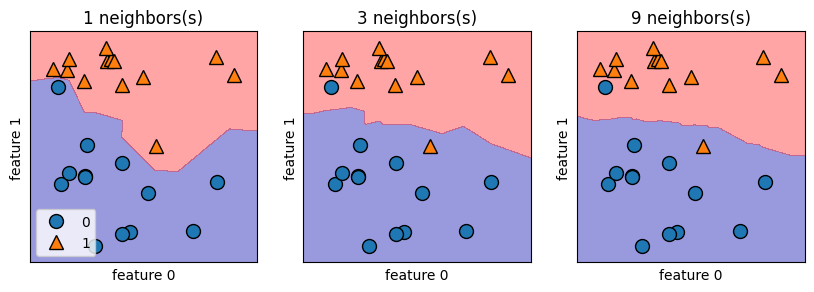

In [ ]:
# =============================================================================
# 教學目標：比較不同 n_neighbors 參數對 KNN 分類邊界的影響
# 適用對象：機器學習初學者
# 學習重點：理解模型複雜度與泛化能力的關係
# =============================================================================

# 導入 matplotlib 用於繪圖
import matplotlib.pyplot as plt

# =============================================================================
# 步驟1：建立子圖布局
# 教學目的：讓學生學習如何建立多個子圖進行比較
# AI提示：請建立一個 1x3 的子圖布局，用於比較不同的 n_neighbors 參數
# =============================================================================
# 建立 1x3 的子圖布局，圖表大小為 (10,3)
# 這樣可以同時比較三個不同的 n_neighbors 參數
fig, axes = plt.subplots(1, 3, figsize=(10,3))

# =============================================================================
# 步驟2：迴圈繪製不同參數的 KNN 分類邊界
# 教學目的：讓學生理解不同參數對分類邊界的影響
# AI提示：請使用迴圈繪製 n_neighbors 為 1, 3, 9 的 KNN 分類邊界圖
# =============================================================================
# 使用迴圈繪製不同 n_neighbors 參數的 KNN 分類邊界
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 建立並訓練 KNN 分類器
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    
    # 繪製分類邊界（決策邊界）
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    
    # 繪製數據點
    mglearn.discrete_scatter(X[:, 0],X[:,1], y, ax=ax)
    
    # 設定子圖標題
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    
    # 設定軸標籤
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

# 在第一個子圖顯示圖例
axes[0].legend(loc=3)

# =============================================================================
# 教學重點說明：
# 1. n_neighbors=1：決策邊界緊密跟隨訓練數據，模型複雜度高
# 2. n_neighbors=3：決策邊界較平滑，平衡複雜度和泛化能力
# 3. n_neighbors=9：決策邊界最平滑，模型複雜度低，泛化能力好
# 4. 模型複雜度：鄰居數量越少，模型越複雜，越容易過擬合
# 5. 泛化能力：鄰居數量越多，模型越簡單，泛化能力越好
# 6. 視覺化比較：通過並排比較，直觀理解參數影響
# =============================================================================

說明 stratify的用途
- 讓訓練集和測試集內,target的比例相同

In [ ]:
# =============================================================================
# 教學目標：示範 train_test_split 中分層分割 (stratify) 的重要性
# 適用對象：機器學習初學者
# 學習重點：理解不平衡數據集在分割時可能遇到的問題
# =============================================================================

# 導入必要的函式庫
import numpy as np
from sklearn.model_selection import train_test_split

# =============================================================================
# 步驟1：建立模擬的不平衡數據集
# 教學目的：讓學生理解什麼是不平衡數據集
# AI提示：請建立一個包含100個樣本的二分類數據集，其中類A有70個樣本，類B有30個樣本
# =============================================================================
# 建立標籤：70個類A樣本(標籤為0)和30個類B樣本(標籤為1)
y = np.array([0] * 70 + [1] * 30)  # 0代表類A，1代表類B
# 建立特徵：100個樣本，每個樣本有2個特徵，使用隨機數值
X = np.random.rand(100, 2)  # 虛擬特徵

# =============================================================================
# 步驟2：不使用分層分割的範例
# 教學目的：展示普通分割可能造成的問題
# AI提示：請使用 train_test_split 將數據分割為訓練集和測試集，比例為8:2
# =============================================================================
# 執行普通的分割（不使用分層）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 顯示分割後的類別比例
print("不使用分層分割的結果：")
print("訓練集類別比例：", np.bincount(y_train) / len(y_train))
print("測試集類別比例：", np.bincount(y_test) / len(y_test))

# =============================================================================
# 步驟3：使用分層分割的範例
# 教學目的：展示分層分割如何保持類別比例
# AI提示：請使用 train_test_split 並加上 stratify 參數來保持類別比例
# =============================================================================
# 執行分層分割（使用 stratify 參數保持類別比例）
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 顯示分層分割後的類別比例
print("\n使用分層分割的結果：")
print("訓練集類別比例：", np.bincount(y_train_stratified) / len(y_train_stratified))
print("測試集類別比例：", np.bincount(y_test_stratified) / len(y_test_stratified))

# =============================================================================
# 教學重點總結：
# 1. 不平衡數據集：不同類別的樣本數量差異很大
# 2. 普通分割問題：可能導致訓練集和測試集的類別比例不一致
# 3. 分層分割優勢：確保訓練集和測試集保持相同的類別比例
# 4. 實際應用：在機器學習中，保持數據分布一致性對模型評估很重要
# =============================================================================


不使用分層：
訓練集比例： [0.7125 0.2875]
測試集比例： [0.65 0.35]

使用分層：
訓練集比例： [0.7 0.3]
測試集比例： [0.7 0.3]


- 讓我們研究一下是否可以確認我們之前討論過的模型複雜性和泛化之間的聯繫。我們將在現實世界的乳癌資料集上進行此操作。
- 我們評估具有不同數量鄰居的訓練和測試集性能。

In [2]:
#下載中文字型
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont (1).ttf'

In [3]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

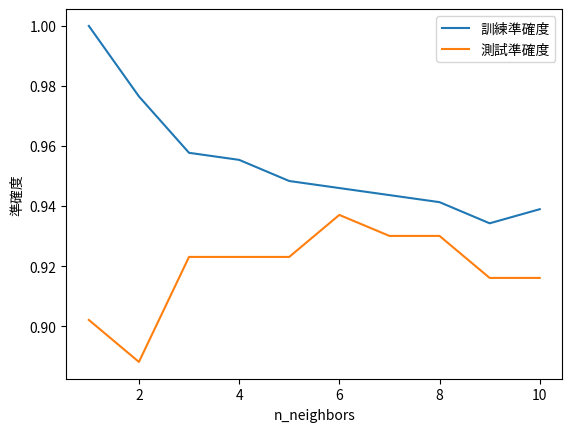

In [ ]:
# =============================================================================
# 教學目標：在真實數據集上分析 KNN 模型的複雜度與泛化能力
# 適用對象：機器學習初學者
# 學習重點：理解模型複雜度對訓練和測試準確度的影響
# =============================================================================

# 導入必要的函式庫
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# =============================================================================
# 步驟1：載入真實數據集
# 教學目的：讓學生接觸真實世界的機器學習數據集
# AI提示：請載入 sklearn 的乳癌數據集，這是一個二元分類數據集
# =============================================================================
# 載入乳癌數據集，這是一個真實世界的二元分類數據集
# 包含 569 個樣本，30 個特徵，用於預測腫瘤是良性還是惡性
cancer = load_breast_cancer()

# =============================================================================
# 步驟2：分割數據集並使用分層分割
# 教學目的：讓學生學習在真實數據集上使用分層分割
# AI提示：請使用 train_test_split 並加上 stratify 參數來保持類別比例
# =============================================================================
# 使用分層分割確保訓練集和測試集的類別比例相同
# stratify=cancer.target 確保良性/惡性腫瘤的比例在訓練集和測試集中保持一致
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

# =============================================================================
# 步驟3：初始化準確度記錄列表
# 教學目的：讓學生學習如何記錄和分析模型性能
# AI提示：請建立兩個空列表來記錄訓練準確度和測試準確度
# =============================================================================
# 建立空列表來儲存不同 n_neighbors 參數下的準確度
training_accuracy = []  # 儲存訓練準確度
test_accuracy = []      # 儲存測試準確度（泛化準確度）

# =============================================================================
# 步驟4：設定參數範圍
# 教學目的：讓學生理解如何系統性地測試不同參數
# AI提示：請設定 n_neighbors 的範圍從 1 到 10
# =============================================================================
# 定義 n_neighbors 的測試範圍，從 1 到 10
# 這樣可以系統性地分析不同鄰居數量對模型性能的影響
neighbors_settings = range(1, 11)

# =============================================================================
# 步驟5：迴圈測試不同參數
# 教學目的：讓學生學習如何系統性地評估模型性能
# AI提示：請使用迴圈測試不同的 n_neighbors 參數，並記錄準確度
# =============================================================================
# 對每個 n_neighbors 值進行測試
for n_neighbors in neighbors_settings:
    # 建立 KNN 分類器，設定鄰居數量
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # 使用訓練資料訓練模型
    clf.fit(X_train, y_train)
    
    # 計算並記錄訓練準確度
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 計算並記錄測試準確度（泛化準確度）
    test_accuracy.append(clf.score(X_test, y_test))

# =============================================================================
# 步驟6：視覺化分析結果
# 教學目的：讓學生學習如何視覺化模型性能分析
# AI提示：請繪製訓練準確度和測試準確度隨 n_neighbors 變化的曲線圖
# =============================================================================
# 繪製準確度曲線，分析模型複雜度與泛化能力的關係
plt.plot(neighbors_settings, training_accuracy, label="訓練準確度")
plt.plot(neighbors_settings, test_accuracy, label="測試準確度")
plt.ylabel("準確度")
plt.xlabel("n_neighbors")
plt.legend()

# =============================================================================
# 教學重點總結：
# 1. 真實數據集：乳癌數據集是實際的醫療數據，具有實際應用價值
# 2. 分層分割：確保數據分布的一致性，提高模型評估的可靠性
# 3. 系統性測試：通過迴圈測試不同參數，找出最佳模型配置
# 4. 過擬合分析：訓練準確度高但測試準確度低表示過擬合
# 5. 泛化能力：測試準確度反映模型在未見數據上的表現
# 6. 參數選擇：通過比較訓練和測試準確度選擇最佳參數
# =============================================================================